In [1]:
import pandas as pd
import json
import os
from pathlib import Path
import numpy as np

PATH = Path("evaluation_results-seeds")

data = []
for file in PATH.glob('*.json'):
    with open(file) as f:
        try:
            j = json.load(f)
        except:
            print(file)
            continue

    concept, method, seed, _, iteration, _ = str(file.stem).split('-')
    outdict = {
        'concept': concept,
        'method': method,
        'seed': seed,
        'iteration': int(iteration)
    }
    outdict["CLIP-T"] = j["CLIP-T"]
    outdict["CLIP-I"] = j["CLIP-I"]
    outdict["DINO"] = j['DINO']
    outdict["DIV"] = j['DIV']
    data.append(outdict)
data.sort(key=lambda x: (x['concept'], x['method'], x['seed'], x['iteration']))

df = pd.DataFrame(data)
df   

S  0
evaluation_results-seeds/backpack_dog-dreambooth_lora-1-checkpoint-*-eval.json
S  0
evaluation_results-seeds/backpack_dog-dreambooth_lora-2-checkpoint-*-eval.json
S  0
evaluation_results-seeds/can-dreambooth_lora-2-checkpoint-*-eval.json
S  0
evaluation_results-seeds/dog-dreambooth_lora-2-checkpoint-*-eval.json
S  0
evaluation_results-seeds/dog-disenbooth_c_abs-2-checkpoint-*-eval.json
S  0
evaluation_results-seeds/can-disenbooth_c_abs-1-checkpoint-*-eval.json
S  0
evaluation_results-seeds/dog-disenbooth_c_abs-1-checkpoint-*-eval.json
S  0
evaluation_results-seeds/can-disenbooth_c_abs-2-checkpoint-*-eval.json
S  0
evaluation_results-seeds/dog-dreambooth_lora-1-checkpoint-*-eval.json
S  0
evaluation_results-seeds/can-dreambooth_lora-1-checkpoint-*-eval.json
S  0
evaluation_results-seeds/backpack_dog-disenbooth_c_abs-1-checkpoint-*-eval.json
S  0
evaluation_results-seeds/backpack_dog-disenbooth_c_abs-2-checkpoint-*-eval.json


,concept,method,seed,iteration,CLIP-T,CLIP-I,DINO,DIV
0,backpack_dog,disenbooth,1,200,0.349583,0.615158,0.311782,0.669735
1,backpack_dog,disenbooth,1,400,0.350034,0.620219,0.364336,0.643138
2,backpack_dog,disenbooth,1,600,0.346797,0.625556,0.397180,0.626572
3,backpack_dog,disenbooth,1,800,0.346565,0.643374,0.436114,0.607873
4,backpack_dog,disenbooth,1,1000,0.346724,0.652624,0.475334,0.600211
...,...,...,...,...,...,...,...,...
595,dog,mydisenbooth,3,2200,0.313286,0.829910,0.760044,0.612449
596,dog,mydisenbooth,3,2400,0.314055,0.831383,0.758676,0.624633
597,dog,mydisenbooth,3,2600,0.311313,0.830100,0.766521,0.620745
598,dog,mydisenbooth,3,2800,0.309468,0.828601,0.761287,0.611865


In [15]:
# RECHECK maybe
visresemblance_start = {
    'dreambooth': {
        'can': 400,
        'dog': 400,
        'backpack_dog': 400,
    },
    'dreambooth_lora': {
        'can': 400,
        'dog': 600,
        'backpack_dog': 600,
    },
    'disenbooth': {
        'can': 1000,
        'dog': 800, # 1000?
        'backpack_dog': 1200,
    },
    'mydisenbooth': {
        'can': 1000,
        'dog': 800, # 1000?
        'backpack_dog': 1200,
    },
    'disenbooth_c_abs': {
        'can': 1000,
        'dog': 600,
        'backpack_dog': 1000,
    },
    'disenbooth_c_sqr': {
        'can': 1000,
        'dog': 600,
        'backpack_dog': 1000,
    },
}

# RECHECK
optimal_checkpoints = {
    'dreambooth': {
        'can': 800,
        'dog': 600,
        'backpack_dog': 800,
    },
    'dreambooth_lora': {
        'can': 800,
        'dog': 800,
        'backpack_dog': 1000,
    },
    'disenbooth': {
        'can': 2000, # 1800?
        'dog': 1200, 
        'backpack_dog': 1800, # 1800?
    },
    'mydisenbooth': {
        'can': 2000,
        'dog': 1200,
        'backpack_dog': 1800, # 1800?
    },
    'disenbooth_c_abs': {
        'can': 1800,
        'dog': 1200,
        'backpack_dog': 1800,
    },
    'disenbooth_c_sqr': {
        'can': 1800,
        'dog': 1400,
        'backpack_dog': 1800,
    },
}

In [16]:
optimal_df = []
for method in optimal_checkpoints:
    for concept in optimal_checkpoints[method]:
        optimal_df.append(df[(df["method"] == method) & (df["concept"] == concept) & (df['iteration'] == optimal_checkpoints[method][concept])])
optimal_df = pd.concat(optimal_df)
optimal_df[["concept", "method", "CLIP-T", "DINO", "DIV", "CLIP-I"]].groupby(["concept", "method"]).mean()

CLIP-T      DINO       DIV    CLIP-I
concept      method                                                  
backpack_dog disenbooth        0.341768  0.546136  0.574358  0.697410
             disenbooth_c_abs  0.341931  0.531199  0.577230  0.691529
             disenbooth_c_sqr  0.340353  0.535358  0.582041  0.696052
             dreambooth        0.337279  0.535059  0.564754  0.686178
             dreambooth_lora   0.339561  0.487361  0.591633  0.670787
             mydisenbooth      0.341475  0.529446  0.572084  0.682424
can          disenbooth        0.316472  0.713528  0.518920  0.721851
             disenbooth_c_abs  0.314922  0.702285  0.547193  0.712903
             disenbooth_c_sqr  0.317848  0.698079  0.540484  0.711362
             dreambooth        0.309545  0.702072  0.544600  0.738891
             dreambooth_lora   0.337426  0.590043  0.572147  0.652832
             mydisenbooth      0.313013  0.716577  0.525283  0.717278
dog          disenbooth        0.328809  0.743090  0.639542  0.824765
             disenbooth_c_abs  0.328895  0.746518  0.634364  0.823915
             disenbooth_c_sqr  0.327968  0.758330  0.624934  0.830347
             dreambooth        0.330964  0.667934  0.614176  0.812705
             dreambooth_lora   0.331555  0.558834  0.621874  0.785752
             mydisenbooth      0.326743  0.734666  0.641261  0.820307

CLIP-T


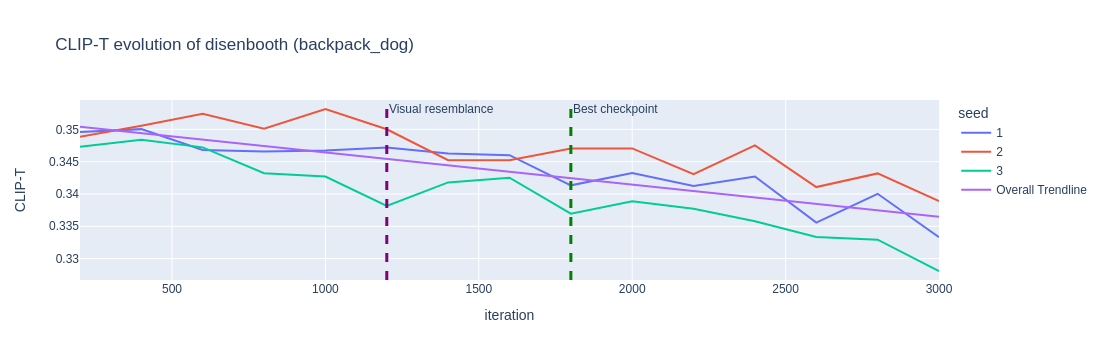

In [17]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go


def make_metric_evolution_plot(method='dreambooth', concept='can', metric='CLIP-T'):
    subdf = df[df['method'] == method]
    subdf = subdf[subdf['concept'] == concept]
    title = f'{metric} evolution of {method} ({concept})'
    print(metric)
    fig = px.scatter(subdf, x="iteration", y=metric, title=title, color='seed' , trendline="ols", trendline_scope='overall')

    fig.update_traces(mode = 'lines')
    fig.add_vline(x=visresemblance_start[method][concept], line_width=3, line_dash="dash", line_color="purple", annotation_text="Visual resemblance")
    fig.add_vline(x=optimal_checkpoints[method][concept], line_width=3, line_dash="dash", line_color="green", annotation_text="Best checkpoint")
    ##fig.update_layout(showlegend=True)
    
    fig.update_yaxes(nticks=10)
    # fig.update_xaxes(nticks=10)
    return fig

method = 'disenbooth'
concept = 'backpack_dog'
fig = make_metric_evolution_plot(method, concept, 'CLIP-T')
'''
fig = make_subplots(rows=3, cols=1)
print(type(fig))
for i, metric in enumerate(['CLIP-T', 'DINO', 'DIV']):
    traces = make_metric_evolution_plot('dreambooth', 'can', metric)
    for trace in range(len(traces["data"])):
        print(trace, i)
        fig.append_trace(traces["data"][trace], row=i + 1, col=1)
'''
fig.show()

DINO


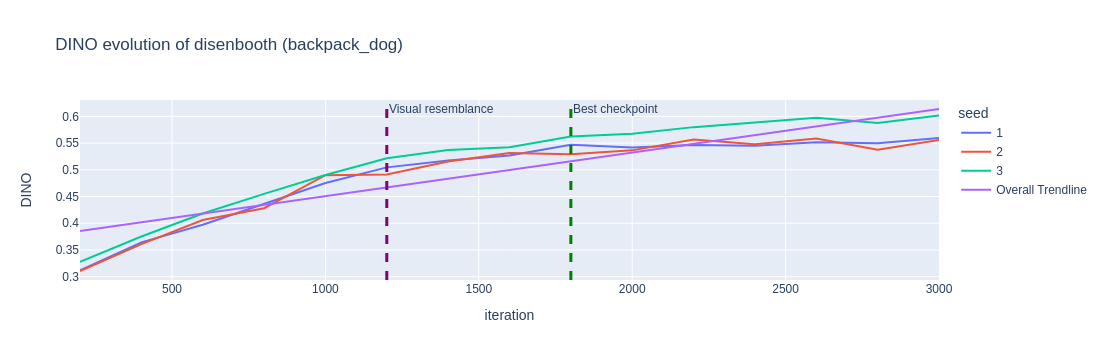

In [18]:
make_metric_evolution_plot(method, concept, 'DINO').show()

DIV


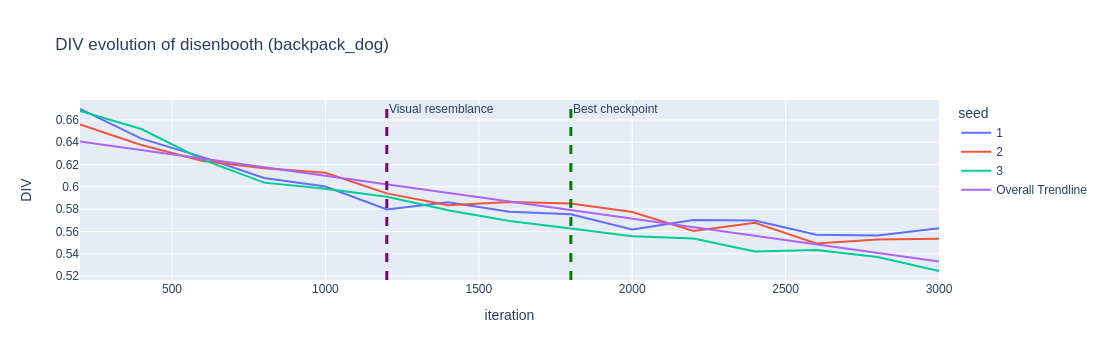

In [19]:
make_metric_evolution_plot(method, concept, 'DIV').show()

In [20]:
def get_mean_curve(curves):
    curves = np.array(curves)
    mean_curve = curves.mean(axis=0)
    return mean_curve    

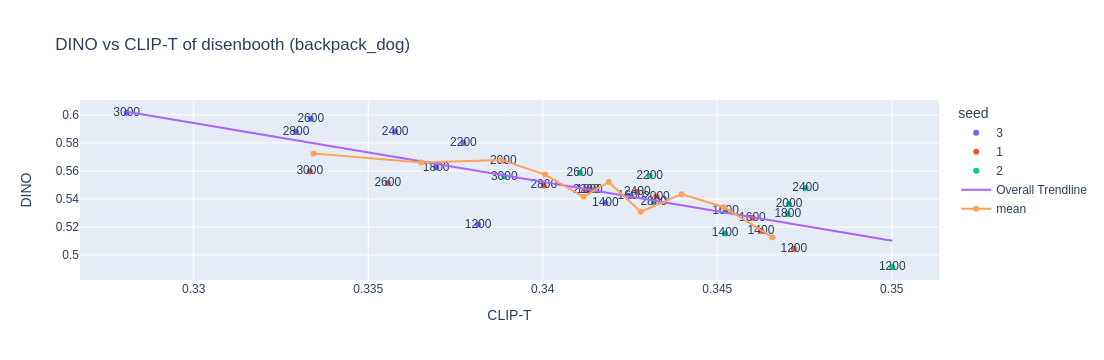

In [21]:
def make_versus_plot(method='dreambooth', concept='can', metric1='DINO', metric2='CLIP-T', exclude_early=False):
    assert(metric1 != metric2)
    subdf = df[df['method'] == method]
    subdf = subdf[subdf['concept'] == concept].copy()
    if exclude_early:
        subdf = subdf[subdf['iteration'] >= visresemblance_start[method][concept]]
    subdf = subdf.sort_values([metric2, metric1])
    title = f'{metric1} vs {metric2} of {method} ({concept})'
    fig = px.scatter(subdf, x=metric2, y=metric1, 
                     text=subdf['iteration'].astype(str),
                     title=title, color='seed', trendline="ols", trendline_scope='overall')
    mean_curve = get_mean_curve([subdf[subdf['seed'] == seed][[metric1, metric2]].values for seed in subdf.seed])
    fig.add_scatter(x=mean_curve[:, 1], y=mean_curve[:, 0], mode='lines+markers', name='mean',
                    showlegend=True) #  annotation_text='',
    fig.update_yaxes(nticks=10)
    fig.update_xaxes(nticks=10)

    # fig.update_traces(mode = 'lines')
    ##fig.update_layout(showlegend=True)
    return fig
make_versus_plot(method, concept, 'DINO', exclude_early=True).show()

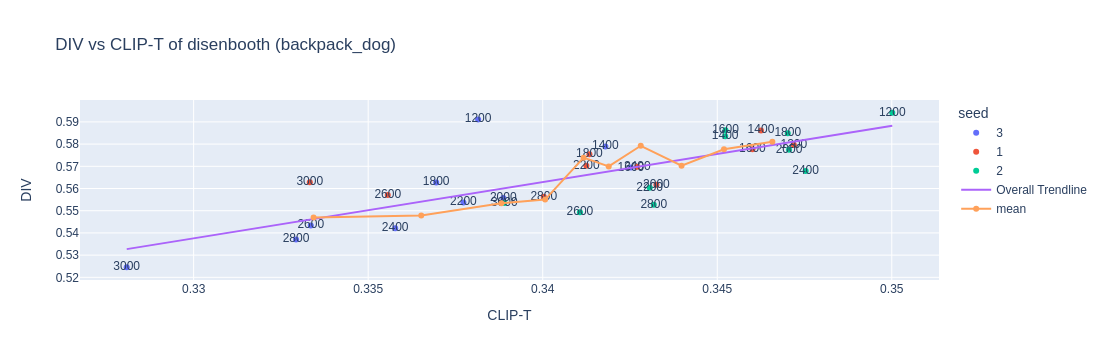

In [22]:
make_versus_plot(method, concept, 'DIV', exclude_early=True).show()

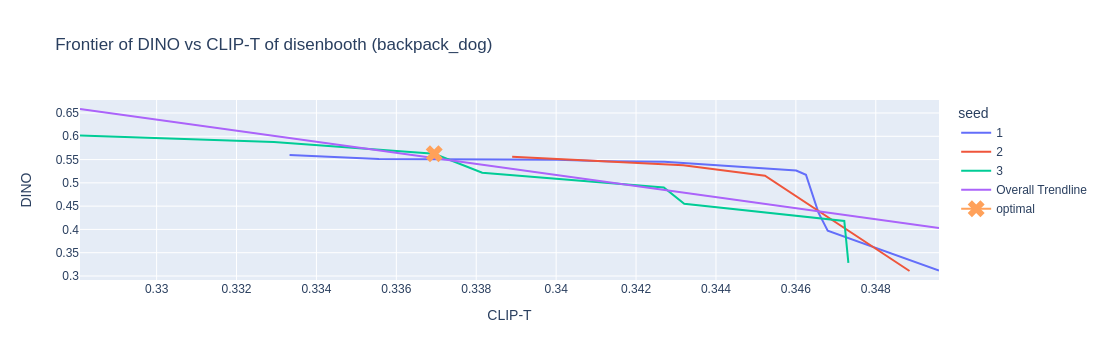

In [23]:
import numpy as np
from scipy.spatial import ConvexHull

def is_pareto_efficient_simple(costs):
    """
    Find the pareto-efficient points
    :param costs: An (n_points, n_costs) array
    :return: A (n_points, ) boolean array, indicating whether each point is Pareto efficient
    """
    is_efficient = np.ones(costs.shape[0], dtype = bool)
    for i, c in enumerate(costs):
        if is_efficient[i]:
            is_efficient[is_efficient] = np.any(costs[is_efficient][:, :2]<c[:2], axis=1)  # Keep any point with a lower cost
            is_efficient[i] = True  # And keep self
    return is_efficient

def select_efficient_frontier(run, metric1, metric2):
    mask = is_pareto_efficient_simple(run[[metric1, metric2]].values)
    return run[mask]


def make_pareto_plot(method='dreambooth', concept='can', metric1='DINO', metric2='CLIP-T', exclude_early=False):
    assert(metric1 != metric2)
    subdf = df[df['method'] == method]
    subdf = subdf[subdf['concept'] == concept].copy()
    if exclude_early:
        subdf = subdf[subdf['iteration'] >= visresemblance_start[method][concept]]
    subdf = subdf.sort_values([metric1, metric2])

    total_mask = np.ones(len(subdf))
    subarrays = []
    for seed in set(subdf.seed):
        subarrays.append(select_efficient_frontier(subdf[subdf['seed'] == seed], metric1, metric2))
    subdf = pd.concat(subarrays)
    optimal_solution = subdf[subdf['iteration'] == optimal_checkpoints[method][concept]]
    #ch = ConvexHull(arr, qhull_options='QG1')
    #subdf = subdf[ch.good]
    title = f'Frontier of {metric1} vs {metric2} of {method} ({concept})'
    fig = px.scatter(subdf, x=metric2, y=metric1, 
                     text=subdf['iteration'].astype(str),
                     title=title, color='seed', trendline="ols", trendline_scope='overall')
    fig.update_traces(mode = 'lines')
    fig.add_scatter(x=[optimal_solution[metric2].median()],
                y=[optimal_solution[metric1].median()],
                marker_symbol='x', marker_size=15,
               name='optimal')
    fig.update_yaxes(nticks=15)
    fig.update_xaxes(nticks=15)

    return fig
make_pareto_plot(method, concept, 'DINO').show()

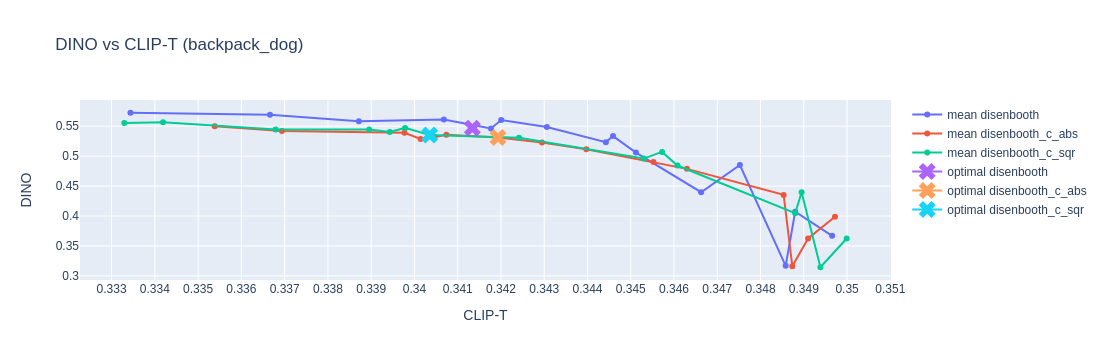

In [25]:
def make_super_versus_plot(concept='can', methods=['dreambooth', 'disenbooth', 'mydisenbooth'],
                          metric1='DINO', metric2='CLIP-T', exclude_early=False):
    curves = []
    exclude_early = False
    title = f'{metric1} vs {metric2} ({concept})'
    for method in methods:
        subdf = df[df['method'] == method]
        subdf = subdf[subdf['concept'] == concept].copy()
        if exclude_early:
            subdf = subdf[subdf['iteration'] >= visresemblance_start[method][concept]]
        subdf = subdf.sort_values(['iteration', metric2, metric1])
        mc = list(get_mean_curve([subdf[subdf['seed'] == seed][[metric1, metric2]].values for seed in subdf.seed]))
        mc.sort(key=lambda x: x[1])
        # mc = np.sort(mc, axis=0)
        curves.append(np.array(mc))
    fig = px.scatter(x=curves[0][:, 1], y=curves[0][:, 0], title=title,
                    labels={
                         "x": metric2,
                         "y": metric1,
                     },
    ) #   name='mean ' + methods[0]
    fig.data[-1].showlegend = True
    
    fig.update_traces(mode = 'lines+markers', name='mean ' + methods[0])
    for i in range(1, len(curves)):
         fig.add_scatter(x=curves[i][:, 1], y=curves[i][:, 0], mode='lines+markers', name='mean ' + methods[i],
                    showlegend=True)
    for method in methods:
        subdf = df[df['method'] == method]
        subdf = subdf[subdf['concept'] == concept].copy()
        if exclude_early:
            subdf = subdf[subdf['iteration'] >= visresemblance_start[method][concept]]
        subdf = subdf.sort_values([metric2, metric1])
        try:
            optimal_checkpoints[method][concept]
        except:
            continue
        optimal_solution = subdf[subdf['iteration'] == optimal_checkpoints[method][concept]]
        fig.add_scatter(x=[optimal_solution[metric2].median()],
                y=[optimal_solution[metric1].median()],
                marker_symbol='x', marker_size=15,
               name='optimal ' + method)
    fig.update_yaxes(nticks=15)
    fig.update_xaxes(nticks=20)
    return fig

disenbooth_c_set = ['disenbooth', 'disenbooth_c_abs', 'disenbooth_c_sqr']
normal_set = ['dreambooth', 'disenbooth', 'mydisenbooth', 'dreambooth_lora']
make_super_versus_plot(concept='backpack_dog', methods=disenbooth_c_set).show()

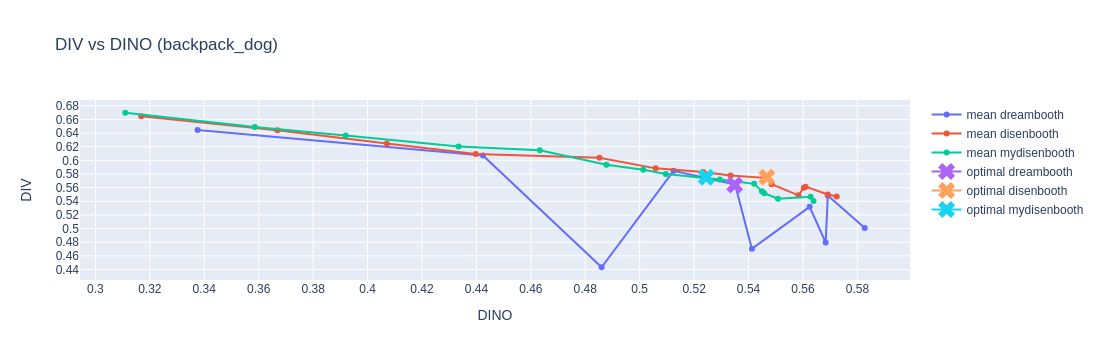

In [29]:
make_super_versus_plot(concept='backpack_dog', metric1='DIV', metric2='DINO').show()

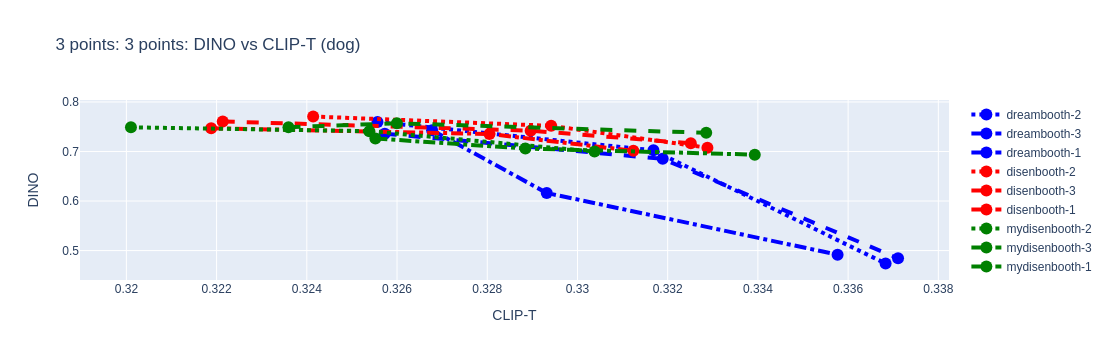

In [30]:
import plotly.graph_objects as go


def make_3point_versus_plot(concept='can', methods=['dreambooth', 'disenbooth', 'mydisenbooth'],
                          metric1='DINO', metric2='CLIP-T', exclude_early=False):
    curves = []
    exclude_early = False
    title = f'3 points: {metric1} vs {metric2} ({concept})'
    df4concat = []
    fig = go.Figure()
    colors = ['blue', 'red', 'green', 'purple', 'yellow', 'pink']

    for i, method in enumerate(methods):
        subdf = df[df['method'] == method]
        subdf = subdf[subdf['concept'] == concept].copy()
        subdf = subdf.sort_values([metric2, metric1])
        opt = optimal_checkpoints[method][concept]
        subdf = subdf[(subdf['iteration'] == opt) | (subdf['iteration'] == opt - 400) | (subdf['iteration'] == opt + 400)]
        for seed in set(subdf.seed):
            s = subdf[subdf['seed'] == seed]
            fig.add_trace(go.Scatter(x=s[metric2], y=s[metric1], name=f'{method}-{seed}',
                          text=s['iteration'].astype(str),
                         mode='lines+markers',
                         marker=dict(size=12),
                         line=dict(color=colors[i], width=4, dash=['dash', 'dot', 'dashdot'][int(seed) - 1])))
    fig.update_layout(title='3 points: ' + title,
                   xaxis_title=metric2,
                   yaxis_title=metric1)
    # fig.update_traces(marker=dict(size=12))

    return fig
make_3point_versus_plot(concept='dog').show()

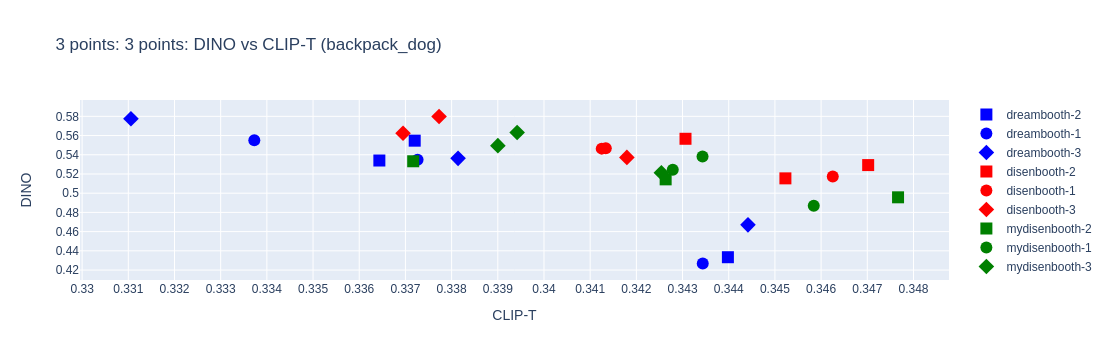

In [40]:
import plotly.graph_objects as go


def make_3point_versus_plot(concept='can', methods=['dreambooth', 'disenbooth', 'mydisenbooth'],
                          metric1='DINO', metric2='CLIP-T', exclude_early=False):
    curves = []
    exclude_early = False
    title = f'3 points: {metric1} vs {metric2} ({concept})'
    df4concat = []
    fig = go.Figure()
    colors = ['blue', 'red', 'green', 'purple', 'yellow', 'pink']

    for i, method in enumerate(methods):
        subdf = df[df['method'] == method]
        subdf = subdf[subdf['concept'] == concept].copy()
        subdf = subdf.sort_values([metric2, metric1])
        opt = optimal_checkpoints[method][concept]
        subdf = subdf[(subdf['iteration'] == opt) | (subdf['iteration'] == opt - 400) | (subdf['iteration'] == opt + 400)]
        for seed in set(subdf.seed):
            s = subdf[subdf['seed'] == seed]
            fig.add_trace(go.Scatter(x=s[metric2], y=s[metric1], name=f'{method}-{seed}',
                          text=s['iteration'].astype(str),
                         mode='markers',
                         marker=dict(size=12, symbol=int(seed) - 1),
                         line=dict(color=colors[i], width=4, dash=['dash', 'dot', 'dashdot'][int(seed) - 1])))
    fig.update_layout(title='3 points: ' + title,
                   xaxis_title=metric2,
                   yaxis_title=metric1)
    fig.update_yaxes(nticks=15)
    fig.update_xaxes(nticks=20)
    # fig.update_traces(marker=dict(size=12))

    return fig
make_3point_versus_plot(concept='backpack_dog').show()